<a href="https://colab.research.google.com/github/krishnasree5/health-insurance-prediction/blob/main/HealthInsurancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
medical_charges_data = pd.read_csv(medical_charges_url)

In [4]:
medical_charges_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_charges_data.info()   #datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_charges_data.describe()   #mean, sd, median, ...

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#Age

In [8]:
medical_charges_data.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [9]:
fig = px.histogram(medical_charges_data, x='age', marginal='box', nbins=47, title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

#BMI

In [10]:
medical_charges_data.bmi.describe()

,bmi
count,1338.000000
mean,30.663397
std,6.098187
min,15.960000
25%,26.296250
50%,30.400000
75%,34.693750
max,53.130000


In [11]:
bmifig = px.histogram(medical_charges_data, x='bmi', marginal='box', nbins=40, title='BMI Distribution')
bmifig.update_layout(bargap=0.1)
bmifig.show()

#Charges

In [12]:
chargesfig = px.histogram(medical_charges_data, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'grey'], title='Annual Medical Charges')
chargesfig.update_layout(bargap=0.1)
chargesfig.show()

In [13]:
chargesfig = px.histogram(medical_charges_data, x='charges', marginal='box', color='sex', color_discrete_sequence=['pink', 'blue'], title='Annual Medical Charges')
chargesfig.update_layout(bargap=0.1)
chargesfig.show()

#Smoker

In [14]:
medical_charges_data.smoker.describe()

,smoker
count,1338
unique,2
top,no
freq,1064


In [15]:
medical_charges_data.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [16]:
smokerfig = px.histogram(medical_charges_data, x='smoker', color='sex', title='Smoker Counts')
smokerfig.update_layout(bargap=0.1)
smokerfig.show()

#Ages vs Charges

In [17]:
fig = px.scatter(medical_charges_data, x='age', y='charges', color='smoker',opacity=0.8, hover_data=['sex'], title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

#BMI vs Charges

In [18]:
fig = px.scatter(medical_charges_data, x='bmi', y='charges', color='smoker',hover_data=['sex'],opacity=0.8, title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()
#no relationship b/w bmi and charges

#Childern vs Charges

In [19]:
fig = px.scatter(medical_charges_data, x='children', y='charges',opacity=0.8, title='Children vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
#better to use violin plot
fig = px.violin(medical_charges_data, y='charges', x='children', title='Children vs. Charges')
fig.show()
#ppl pay similar charges despite have no/many children

#Sex vs Charges

In [21]:
fig = px.violin(medical_charges_data, y='charges', x='sex', title='Sex vs. Charges')
fig.show()

paying pretty much the same

#Correlation Coefficient

In [22]:
# how to numerically represent how close two vars are related => correlation coefficient
medical_charges_data.charges.corr(medical_charges_data.age)

np.float64(0.2990081933306476)

In [23]:
medical_charges_data.charges.corr(medical_charges_data.bmi)

np.float64(0.19834096883362895)

In [24]:
medical_charges_data.charges.corr(medical_charges_data.children)

np.float64(0.06799822684790478)

In [25]:
#for smokers => conver data to numerical
smoker_vals = {'yes': 1, 'no': 0}
medical_charges_data.smoker = medical_charges_data.smoker.map(smoker_vals)
medical_charges_data.charges.corr(medical_charges_data.smoker)

np.float64(0.787251430498478)

In [30]:
correlation_matrix = medical_charges_data.drop(columns=['region', 'sex']).corr()

In [31]:
correlation_matrix

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


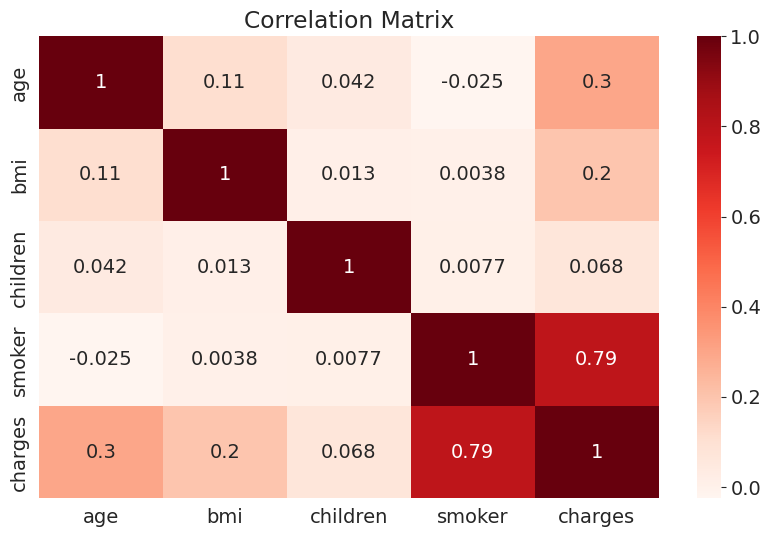

In [32]:
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title("Correlation Matrix")
plt.show()

#Linear Regression using Single Feature

## y = w*x + b
## w = slope/weight; b = intercept/bias
## w,b are pararmeters/weights to our linear regression model. y is target(charges in this case) and x is input (age in this case)

## Charges and Age for non smokers

In [33]:
medical_charges_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [34]:
non_smoker_df = medical_charges_data[medical_charges_data.smoker == 0]

In [35]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


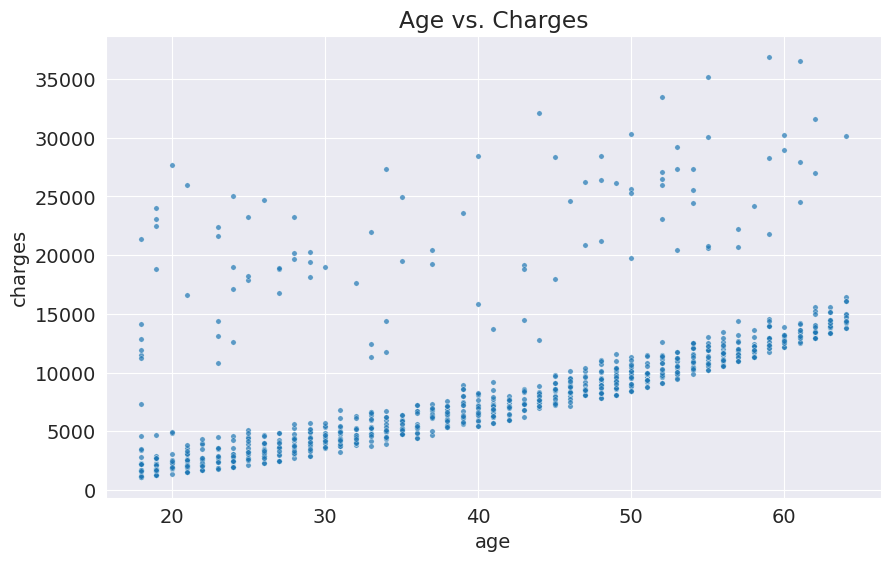

In [36]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [37]:
def estimate_charges(age, w, b):
    return w * age + b

In [38]:
w = 50
b = 100 #assumption

In [39]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

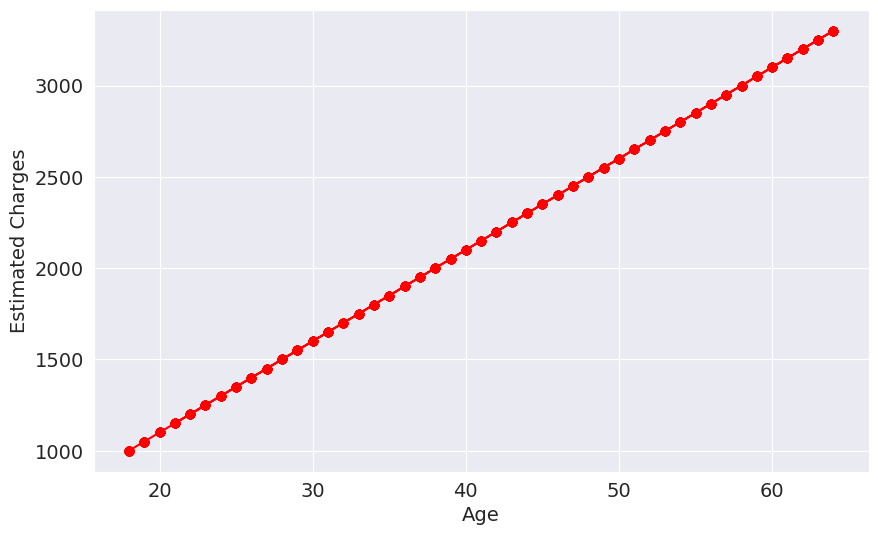

In [40]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

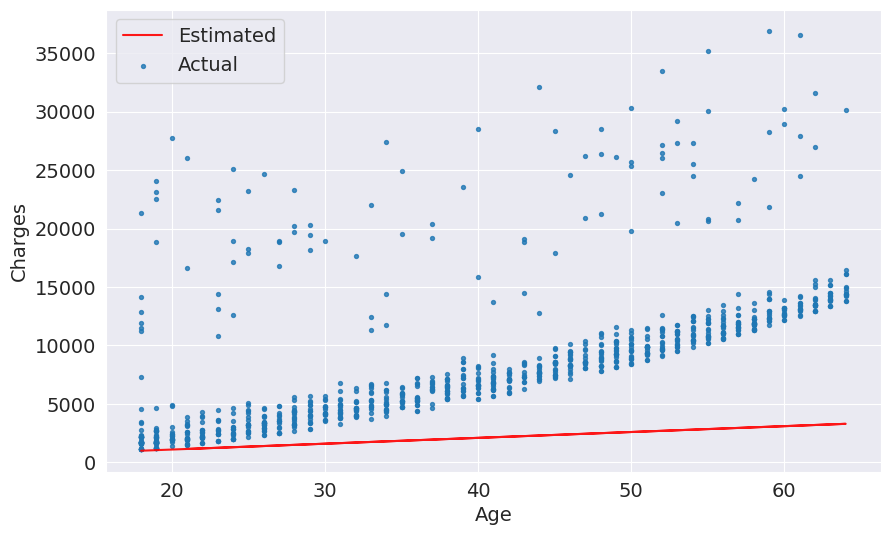

In [43]:
actual_charges = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, actual_charges, s=8, alpha=0.8)
plt.xlabel('Age');
plt.ylabel('Charges');

plt.legend(['Estimated', 'Actual'])

In [46]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimated', 'Actual'])

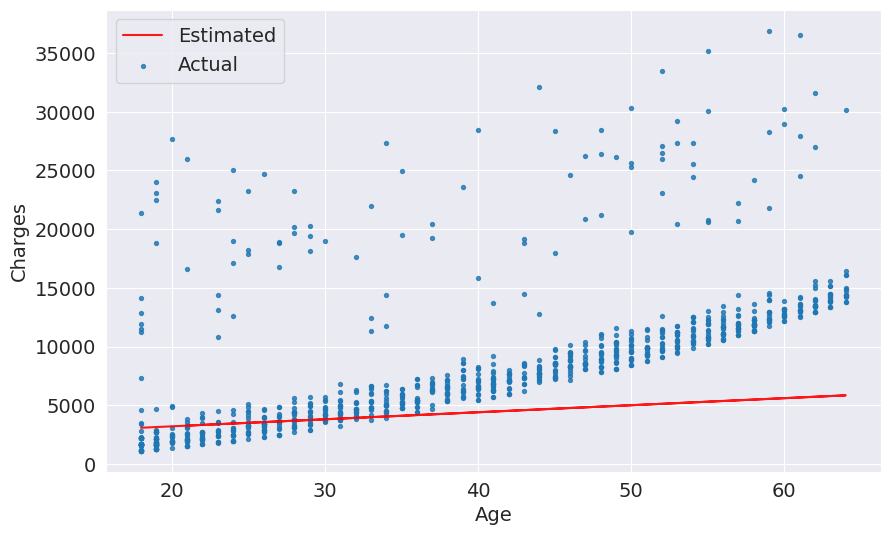

In [47]:
try_parameters(60, 2000)

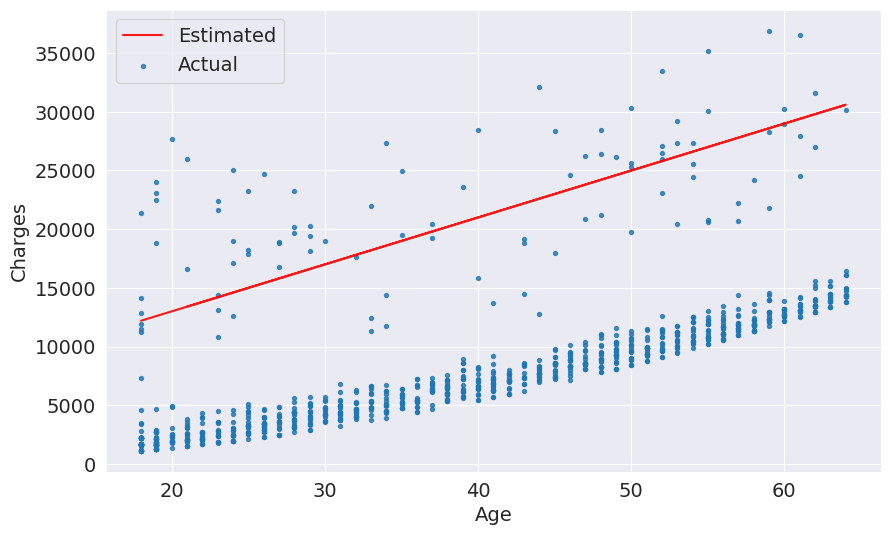

In [49]:
try_parameters(400, 5000)

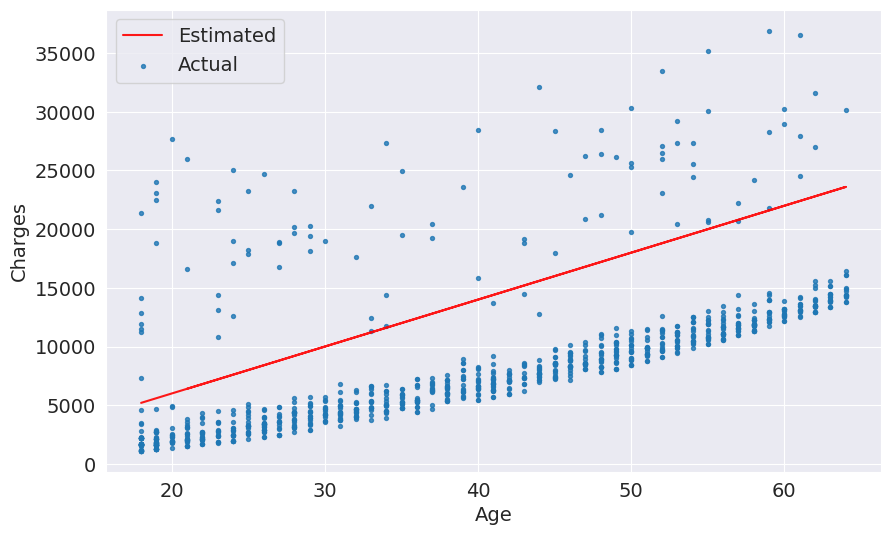

In [51]:
try_parameters(400, -2000)

we need to find the line that best fits the points and then determine the values of w and b

#Loss/Cost Function
##RMSE: how far are we on avg from the actual line
## RMSE = sqrt((Σ(predicted - actual)^2)/(N))

In [53]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [54]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [55]:
import numpy as np

In [60]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [56]:
w = 50
b = 100

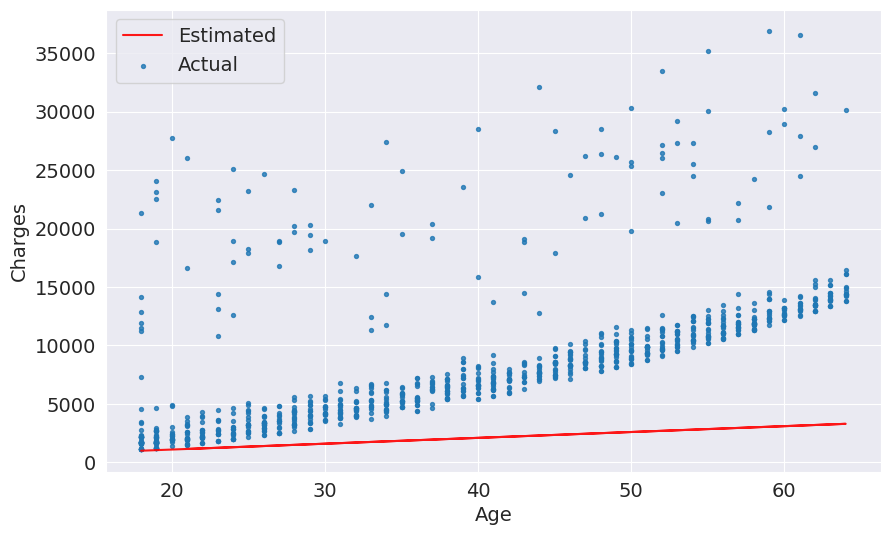

In [57]:
try_parameters(w, b)

In [58]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [61]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [63]:
#off by 8000 => bad model => loss
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

#Optimiser
we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)

Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [68]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print('inputs shape: ',inputs.shape)
print('targets shape: ', targets.shape)

inputs shape:  (1064, 1)
targets shape:  (1064,)


In [69]:
model.fit(inputs, targets)
# fits the line (uses gradient descent or any other algo to predict the best value for w and b (linear relationship) with min loss)

LinearRegression()

In [72]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [75]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [74]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [76]:
loss = rmse(targets, predictions)
loss

np.float64(4662.505766636395)

In [77]:
#off by 4662
print('w: ',model.coef_)
print('b: ', model.intercept_)

w:  [267.24891283]
b:  -2091.4205565650864


RMSE Loss:  4662.505766636395


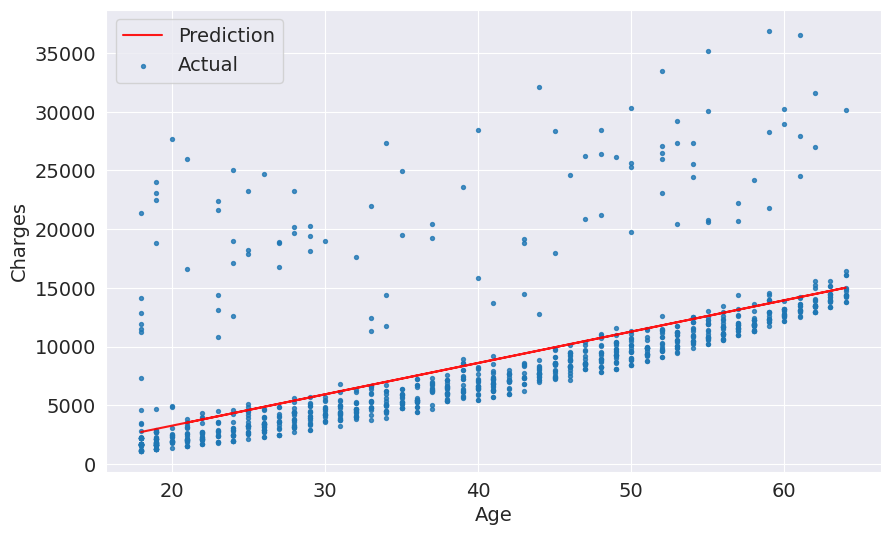

In [78]:
try_parameters(model.coef_, model.intercept_)